   # 🛳️ **Titanic Survival Prediction**  

   ### 👩🏻‍🔧 **By Rosy**




# ***🎯 Goals & Tasks*** 

 ### 1. Provide Insights by Means of Data. 📊
    
 ### 2. Make a Prediction through Machine Learning. 🤖
     

# ***🗂️ Import Libraries*** 

In [1]:
import os

import pandas as pd
import numpy as np

import scipy.stats as stats 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set() 

from scipy.stats import chi2_contingency

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


import warnings 
warnings.filterwarnings('ignore') 

# ***⏳ Data Loading*** 

In [2]:
os.listdir('/kaggle/input/titanic-data')  
df = pd.read_csv('/kaggle/input/titanic-data/train.csv') 

# ***🔭 Data Exploration (Exploratory Data Analysis)***   

### 1. 🔍 **Take a Glimpse of Data**

In [3]:
df.head(5) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. 🔍 **DataType of Each Column**

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 3. 🔍 **Dimensions of the DataFrame**

In [5]:
print(f'Rows: {df.shape[0]}')
print(f'Columns: {df.shape[1]}')  

Rows: 891
Columns: 12


### 4. 🔍 **Descriptive Statistics for numerical & categorical variables**

In [6]:
df.describe()  

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
categorical_var = df.dtypes[df.dtypes == 'object'].index 
df[categorical_var].describe()  

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### 5. 🔍 **Missing Values & Outliers**

In [8]:
df.isnull().sum().sort_values(ascending = False) 

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [9]:
(df.isna().mean()*100).sort_values(ascending=False)   

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

<Axes: >

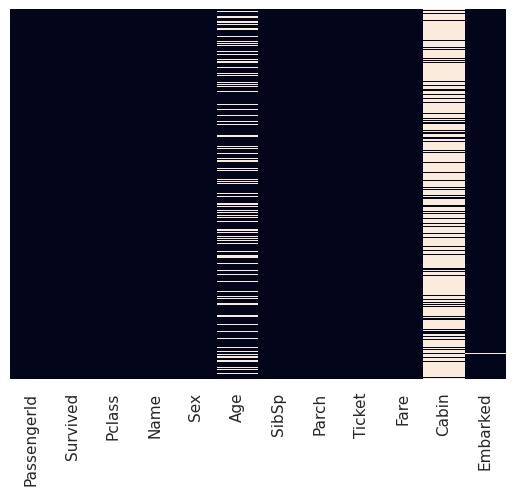

In [10]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False) 

In [11]:
cols = ['Age', 'Fare'] 


fig = px.box(df,
             y = cols, 
             template = 'plotly_dark',
             title = 'Outlier Detection in Columns Age & Fare')   

fig.show() 

###  📝 ***Conclusions from Data Exploration***

1. The columns have float datatypes are 2, integer datatype are 5, object datatype are 5. 

2. There are 891 rows and 12 columns in the DataFrame.

3. Column Cabin has 687 missing values, Column Age has 177 and Column Embarked has 2 missing values.

4. For Column Age, the maximum age is 80, and the minimum is 0.42 years old.

5. The maximum fare is 512.329.  

# 🔨  ***Data Cleaning & Preprocessing***  

### 1. 🔍 **Col: PassengerId**

*  "PassengerId" is an arbitrary identifier assigned to each passenger.

In [12]:
df.drop(['PassengerId'], axis=1, inplace=True)  

### 2. 🔍 **Col: Sex**

* Convert to numerical features which would be better for prediction. 

In [13]:
df['Sex'] = df['Sex'].map({'male': 0, 
                           'female':1})    

### 3. 🔍 **Col: Age** 

In [14]:
df['Age'].describe() 

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

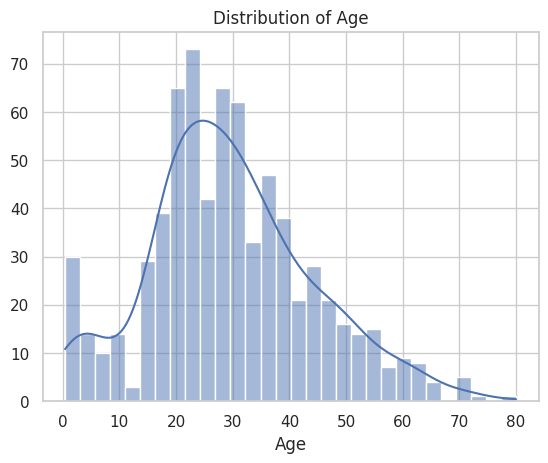

In [15]:
sns.set_style('whitegrid')  
sns.histplot(data=df,
             x=df['Age'].dropna(), 
             bins=30,
             kde=True)

plt.title('Distribution of Age') 
plt.ylabel('')
plt.show() 

### 📝 ***Conclusion*** :  

*  A skewness towards younger passengers between 20-30 years old. 

In [16]:
fig = px.box(data_frame=df,
              x='Pclass', 
              y='Age',
              template='plotly_dark',
              title = 'Age Distribution in Three Classes')  

fig.show()  

### 📝 ***Conclusion*** :  

* The median age of the First Class is higher than that of the Second Class and Third Class. 

In [17]:
group = df.groupby(['Pclass', 'Sex'], as_index=False)['Age'].median()  

fig = px.bar(data_frame=group, 
             x = 'Pclass', 
             y = 'Age', 
             color ='Sex',
             barmode = 'group',
             title = 'Median of Age by Sex in Three Classes', 
             )  


fig.show() 

In [18]:
df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

In [19]:
# Point-Biserial Correlation between Ages and Survival Status:

ages = df['Age']
survival = df['Survived'] 

r_pb, P_value = stats.pointbiserialr(ages, survival) 

print('=== Point-Biserial Correlation Results ===') 
print(f'Correlation Coefficient: {r_pb:.3f}') 
print(f'P_value: {P_value: .4f}') 

=== Point-Biserial Correlation Results ===
Correlation Coefficient: -0.060
P_value:  0.0755


### 4. 🔍 **Col: Ticket**


In [20]:
df['Ticket'][0:10] 

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [21]:
df['Ticket'].describe() 

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

### 📝 ***Conclusion*** : 

1. Ticket is a categorical variable that has **681 unique** values.
   
2. Categorical variables with nearly as many levels as records are often not useful for prediction.

### 🛠️ ***Feature Engineering of Ticket*** :
        1. Extract prefix from tickets containing letters. 
        
        2. Create a new column that transforms prefixes to numeric values according to the mean of 'Survived' group by Passenger Class and Ticket_Prefix. 
        
        3. Create a boolean column indicating if the ticket is purely numeric.
        
        4. Count the frequency of each ticket.  

In [22]:
def extract_prefix(ticket):
    parts = ticket.replace('.', '').replace('/', '').split() 
    prefix = [p for p in parts if not p.isdigit()] 
    return prefix[0] if prefix else 'None' 

df['Ticket_Prefix'] = df['Ticket'].apply(extract_prefix) 

df['Pclass_Prefix_Survival_Rate']= df.groupby(['Pclass', 'Ticket_Prefix'])['Survived'].transform('mean')
df['Ticket_IsNumeric'] = df['Ticket'].apply(lambda x: x.isdigit()).astype(int)
ticket_counts = df['Ticket'].value_counts() 
df['Ticket_Frequency'] = df['Ticket'].map(ticket_counts)   

### 5. 🔍 **Col: Cabin**  

In [23]:
df['Cabin'][0:10]

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

In [24]:
df['Cabin'].describe() 

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

1. Column Cabin has 147 unique values, which may not be particularly useful for prediction.

2. Create a boolean column that indicates if the cabin is missing. 

In [25]:
 df['Has_Cabin'] = df['Cabin'].notna().astype(int)    

In [26]:
df.drop(['Cabin'], axis=1, inplace=True)  


 === Contingency Table === 

Survived     0    1
Has_Cabin          
0          481  206
1           68  136 



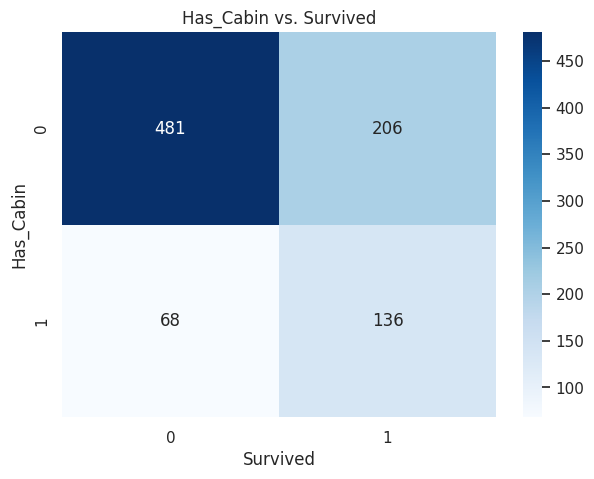

- Chi-square statistics:  87.9415
- P_value: 0.0000
- Degrees of freedom: 1
- Expected frequency: 
 [[423.3030303 263.6969697]
 [125.6969697  78.3030303]]


In [27]:
contingency_table = pd.crosstab(df['Has_Cabin'], df['Survived']) 
print('\n === Contingency Table === \n') 
print(contingency_table, '\n')


plt.figure(figsize=(7,5))  

sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues') 

plt.xlabel('Survived')
plt.ylabel('Has_Cabin') 
plt.title('Has_Cabin vs. Survived') 

plt.show() 

chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'- Chi-square statistics: {chi2: .4f}') 
print(f'- P_value: {p:.4f}') 
print(f'- Degrees of freedom: {dof}') 
print(f'- Expected frequency: \n {expected}') 

### 6. 🔍 **Embarked**  

In [28]:
embark = pd.get_dummies(df['Embarked'], drop_first=True, dtype=int)
df = pd.concat([df, embark], axis=1)    

### 7. 🔍 **Combine Col SibSp with Col Parch to Create a New Variable: Family**  

In [29]:
df['Family'] = df['SibSp'] + df['Parch'] + 1 

most_family = np.where(df['Family'] == max(df['Family'])) 
df[['Name', 'Ticket_Prefix', 'Pclass', 'Family', 'Survived']].loc[most_family]    

,Name,Ticket_Prefix,Pclass,Family,Survived
159,"Sage, Master. Thomas Henry",CA,3,11,0
180,"Sage, Miss. Constance Gladys",CA,3,11,0
201,"Sage, Mr. Frederick",CA,3,11,0
324,"Sage, Mr. George John Jr",CA,3,11,0
792,"Sage, Miss. Stella Anna",CA,3,11,0
846,"Sage, Mr. Douglas Bullen",CA,3,11,0
863,"Sage, Miss. Dorothy Edith ""Dolly""",CA,3,11,0


In [30]:
df.drop(['Ticket_Prefix','Name', 'Ticket', 'SibSp', 'Parch'], axis=1, inplace=True)  

# 🎥   ***Data Visualization***   

### 1. 🔍 **Survivial Rate Distribution**

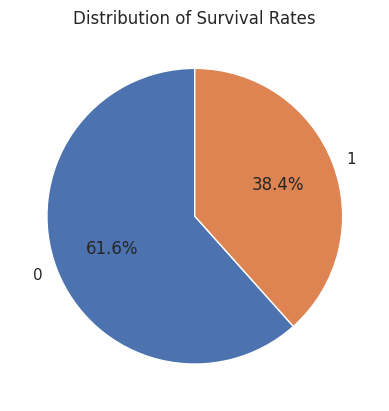

In [31]:
df['Survived'].value_counts().plot(kind='pie',
                                   startangle= 90, 
                                   autopct = '%1.1f%%') 

plt.ylabel('')
plt.title('Distribution of Survival Rates')
plt.show()    

### 2. 🔍 **Create Subplots that Display the Count of Survivors Categorized by Port of embarkation & Pclass**

In [32]:
cate_cols = ['Embarked', 'Pclass'] 
target = 'Survived'   

In [33]:
fig = plt.figure(figsize = (25, len(cate_cols)*6))  

<Figure size 2500x1200 with 0 Axes>

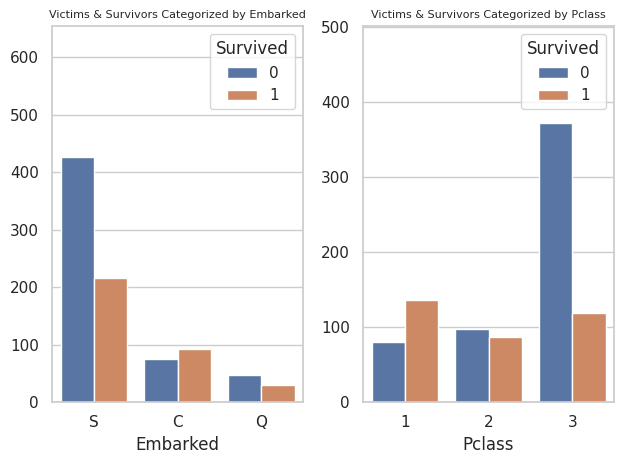

In [34]:
for i, col in enumerate(cate_cols):
    plt.subplot(len(cate_cols)//2 + len(cate_cols)%2, 2, i+1) 
    sns.countplot(data=df,
                  x=col,
                  hue=target)  
    plt.title(f'Victims & Survivors Categorized by {col}', fontsize=8) 
    plt.ylim(0, df[col].value_counts().max()+10) 
    plt.ylabel('')


plt.tight_layout() 
plt.show() 


### 3. 🔍 **Create a Barplot that Displays Survived Distribution Categorized by Sex in Three Passenger classes** 

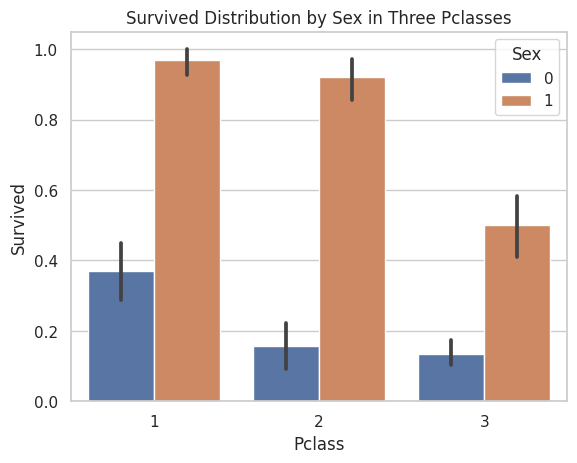

In [35]:
sns.barplot(data=df, 
            x='Pclass',
            y = 'Survived', 
            hue = 'Sex') 

plt.title('Survived Distribution by Sex in Three Pclasses') 
plt.show() 

### 4. 🔍 **Create a Boxplot to illustrate the age distribution categorized by survival status**

In [36]:
fig = px.box(data_frame = df, 
             x = 'Survived', 
             y = 'Age',
             template = 'plotly_dark', 
             title = 'Age Distribution Categorized by Survival Status')  

fig.show() 


In [37]:
df.drop('Embarked', axis=1, inplace=True) 

# 🤖   ***Machine Learning***   

In [38]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Survived                     891 non-null    int64  
 1   Pclass                       891 non-null    int64  
 2   Sex                          891 non-null    int64  
 3   Age                          891 non-null    float64
 4   Fare                         891 non-null    float64
 5   Pclass_Prefix_Survival_Rate  891 non-null    float64
 6   Ticket_IsNumeric             891 non-null    int64  
 7   Ticket_Frequency             891 non-null    int64  
 8   Has_Cabin                    891 non-null    int64  
 9   Q                            891 non-null    int64  
 10  S                            891 non-null    int64  
 11  Family                       891 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 83.7 KB


In [39]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare',
       'Pclass_Prefix_Survival_Rate', 'Ticket_IsNumeric', 'Ticket_Frequency',
       'Has_Cabin', 'Q', 'S', 'Family'],
      dtype='object')

### 1. 🔍 **Modeling** 

In [40]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [41]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [42]:
log_model = LogisticRegression () 
rfc = RandomForestClassifier(n_estimators=200) 

In [43]:
log_model.fit(X_train, y_train) 
rfc.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=200)

### 2. 🔍 **Prediction**

In [44]:
predictions = log_model.predict(X_test) 
rfc_predictions=rfc.predict(X_test) 

### 3. 🔍 **Evaluation**

In [45]:
print("\nLogistic Regression Report:\n", confusion_matrix(y_test, predictions), '\n', classification_report(y_test, predictions))
print("\nRandom Forest Report:\n", confusion_matrix(y_test, rfc_predictions),'\n',  classification_report(y_test, rfc_predictions))


Logistic Regression Report:
 [[137  20]
 [ 26  85]] 
               precision    recall  f1-score   support

           0       0.84      0.87      0.86       157
           1       0.81      0.77      0.79       111

    accuracy                           0.83       268
   macro avg       0.83      0.82      0.82       268
weighted avg       0.83      0.83      0.83       268


Random Forest Report:
 [[134  23]
 [ 32  79]] 
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       157
           1       0.77      0.71      0.74       111

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.79       268
weighted avg       0.79      0.79      0.79       268

